In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
theta = [0, np.pi/2, np.pi, 3*np.pi/2]



In [100]:
path = "./images/"
F = [plt.imread(path + "f1.jpg"), 
     plt.imread(path + "f2-2.jpg"), 
     plt.imread(path + "f3.jpg"),
     plt.imread(path + "f4.jpg")]

# O1 = [plt.imread(path + "O1-1.jpg"), 
#      plt.imread(path + "O1-2.jpg"), 
#      plt.imread(path + "O1-3.jpg"),
#      plt.imread(path + "O1-4.jpg")]

O1 = [plt.imread(path + "O2-1.jpg"), 
     plt.imread(path + "O2-2.jpg"), 
     plt.imread(path + "O2-3.jpg"),
     plt.imread(path + "O2-4.jpg")]

In [101]:
dim = 800

IMG = F[0][1600:2600, 1100:2100]
pts1 = np.float32([[50,50],[980,0],[0,950],[1000,1000]])
pts2 = np.float32([[0,0],[800,0],[0,800],[800,800]])
M = cv2.getPerspectiveTransform(pts1,pts2)



dst = cv2.warpPerspective(IMG,M,(800,800))

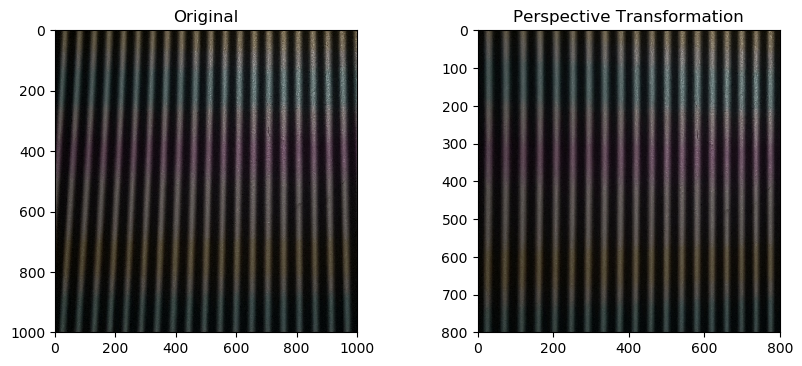

In [102]:


plt.figure(figsize= [10,4], dpi = 100, facecolor = 'w')
plt.subplot(121)
plt.title("Original")
plt.imshow(IMG)
plt.subplot(122)
plt.title("Perspective Transformation")
plt.imshow(dst)
plt.show()



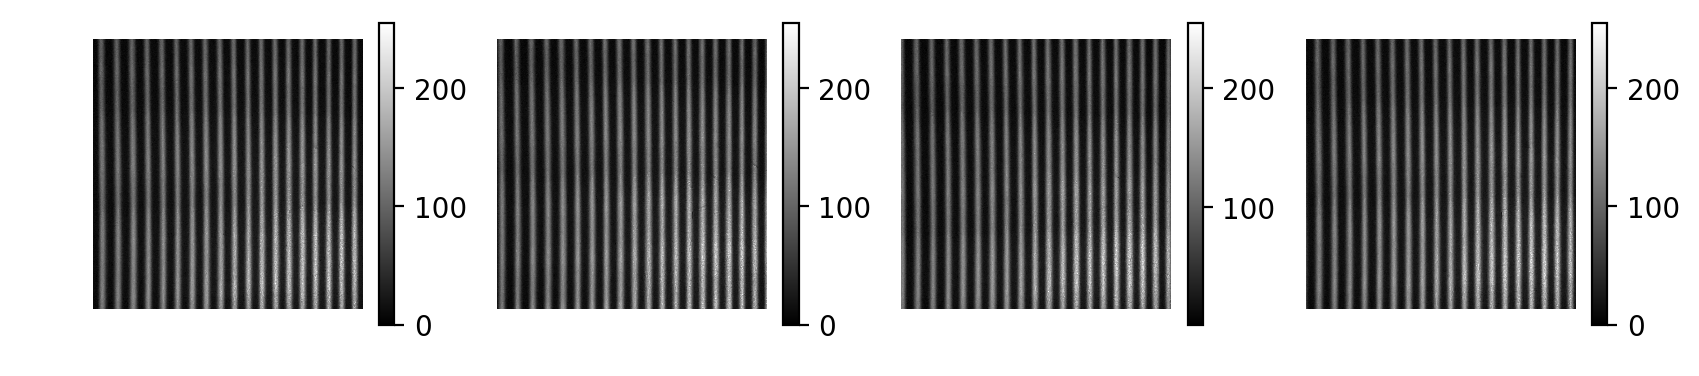

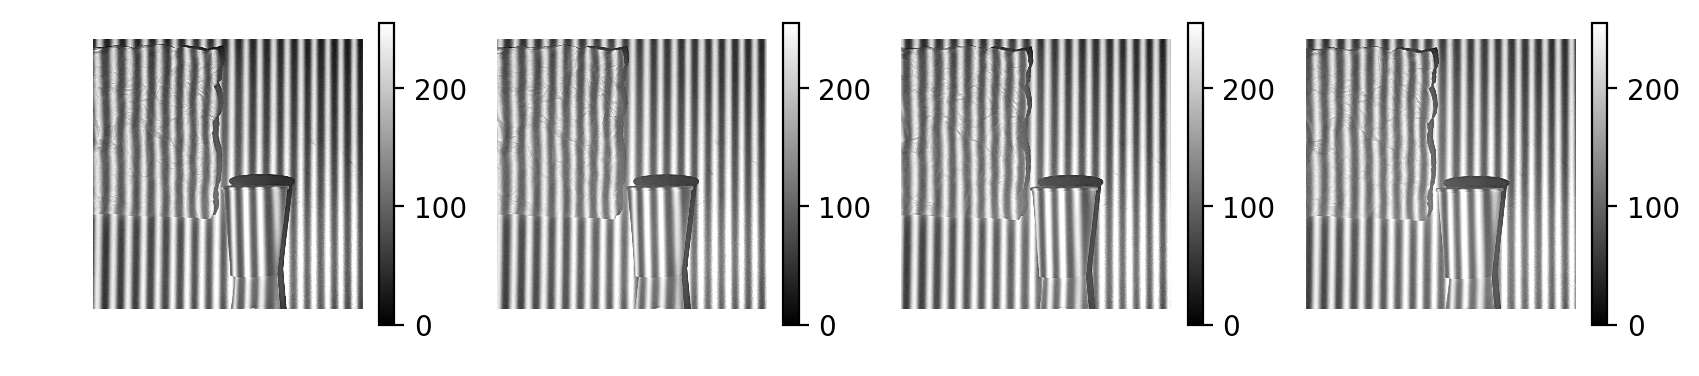

In [103]:
i = 1
plt.figure(figsize = [10,2],dpi = 200, facecolor = 'w')

FLAT = []

for f in F:
    flat = f[1600:2600, 1100:2100]
    flat = cv2.cvtColor(flat, cv2.COLOR_BGR2GRAY)
    flat = cv2.warpPerspective(flat,M,(800,800))
    flat = 255*(flat/flat.max())
    FLAT.append(flat)
    plt.subplot(1,4,i)
    plt.imshow(flat, origin = "lower", cmap = 'gray')
    plt.axis('off')
    plt.colorbar()

    i += 1
plt.show()

OBJ1 = []

i = 1
plt.figure(figsize = [10,2],dpi = 200, facecolor = 'w')
for o in O1:
    obj = o[1600:2600, 1100:2100]
    obj = cv2.cvtColor(obj, cv2.COLOR_BGR2GRAY)
    obj = cv2.warpPerspective(obj,M,(800,800))
    obj = 255*((obj-obj.min())/(obj.max()-obj.min()))
    OBJ1.append(obj)
    plt.subplot(1,4,i)
    plt.imshow(obj, origin = "lower", cmap = 'gray')
    plt.axis('off')
    plt.colorbar()

    i += 1
plt.show()


In [104]:
FLAT_m = np.copy(FLAT)
N = 1
for i in range(N):
    I1 = np.mean(FLAT_m[0]) + FLAT_m[0]*np.cos(theta[0])
    I2 = np.mean(FLAT_m[1]) - FLAT_m[1]*np.sin(theta[1])
    I3 = np.mean(FLAT_m[2]) - FLAT_m[2]*np.cos(theta[2])
    I4 = np.mean(FLAT_m[3]) + FLAT_m[3]*np.sin(theta[3])

    FLAT_m = [I1,I2,I3,I4]
    
OBJ1_m = np.copy(OBJ1)
for i in range(N):
    I1 = np.mean(OBJ1_m[0]) + OBJ1_m[0]*np.cos(theta[0])
    I2 = np.mean(OBJ1_m[1]) - OBJ1_m[1]*np.sin(theta[1])
    I3 = np.mean(OBJ1_m[2]) - OBJ1_m[2]*np.cos(theta[2])
    I4 = np.mean(OBJ1_m[3]) + OBJ1_m[3]*np.sin(theta[3])

    OBJ1_m = [I1,I2,I3,I4]

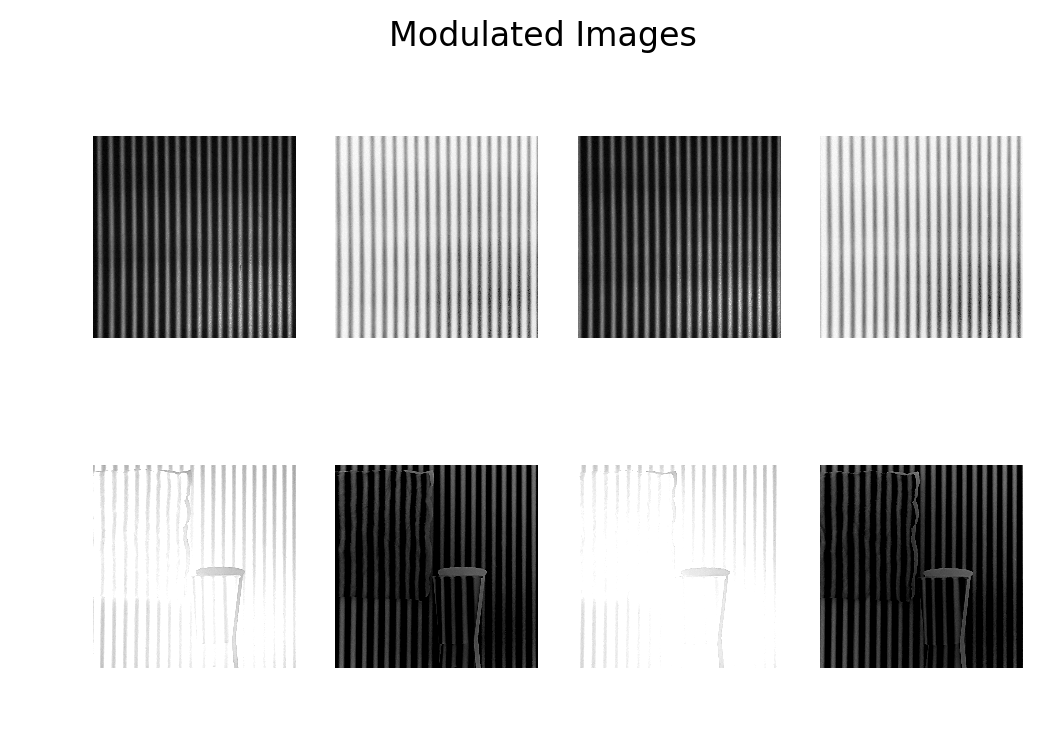

In [105]:
plt.figure(dpi = 200)
for i in range(4):
    plt.suptitle("Modulated Images")
    plt.subplot(2,4,i+1)
    plt.imshow(FLAT_m[i], origin = "lower", cmap = 'gray')
    plt.axis('off')
    plt.subplot(2,4,i+5)
    plt.imshow(OBJ1_m[i], origin = "lower", cmap = 'gray', vmin = 0, vmax = 255)
    plt.axis('off')

plt.show()


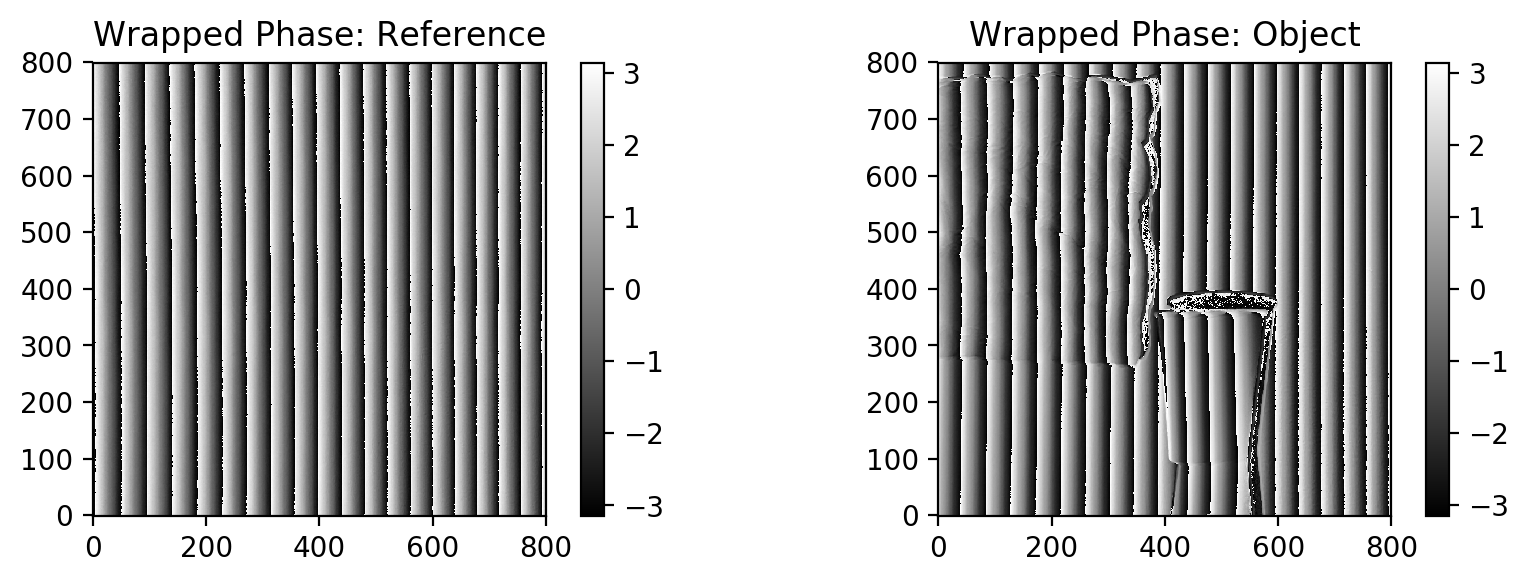

In [106]:
plt.figure(figsize = [10,3], dpi = 200)

phase_f = np.arctan2((FLAT_m[3]-FLAT_m[1]),(FLAT_m[0]-FLAT_m[2])).astype(float)
phase_o = np.arctan2((OBJ1_m[3]-OBJ1_m[1]),(OBJ1_m[0]-OBJ1_m[2])).astype(float)

plt.subplot(121)
plt.title("Wrapped Phase: Reference")
plt.imshow(phase_f, cmap = 'gray', origin = "lower")
plt.colorbar()
plt.subplot(122)
plt.title("Wrapped Phase: Object")
plt.imshow(phase_o, cmap = 'gray', origin = "lower")
plt.colorbar()
plt.show()

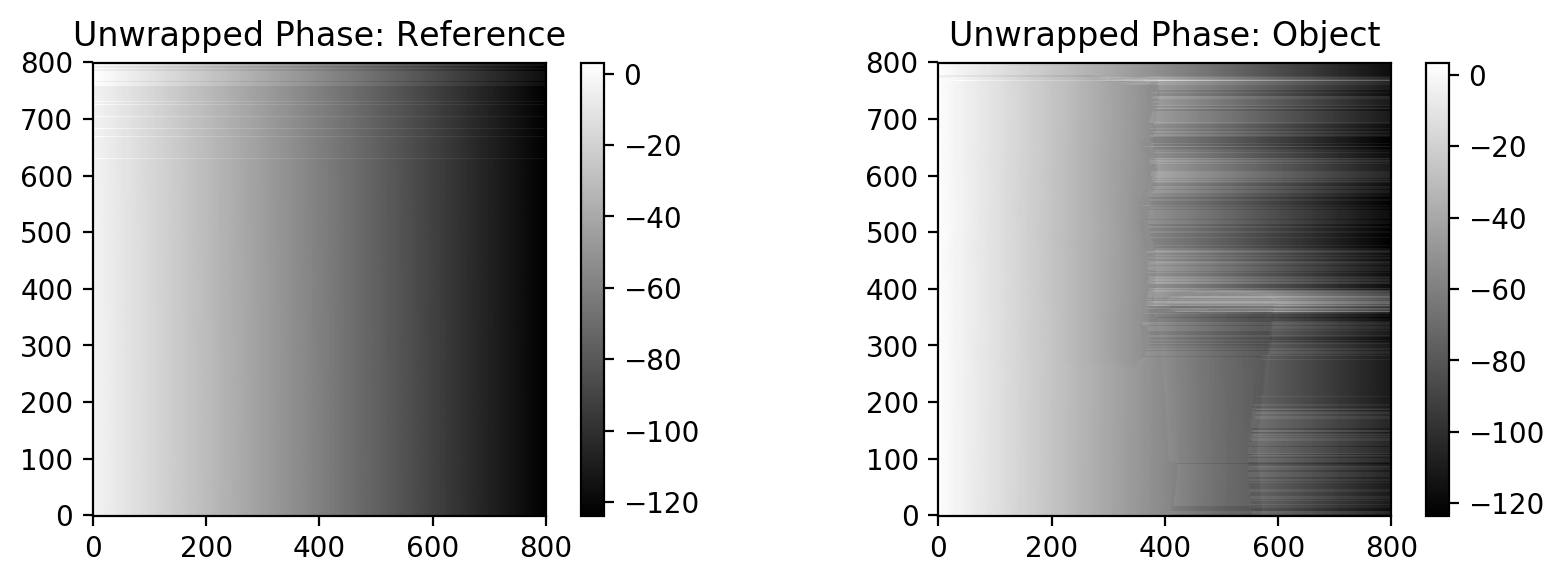

In [107]:
plt.figure(figsize = [10,3], dpi = 200)

unwrapped_flat = np.unwrap(phase_f,discont=1.5*3.141592653589793, axis=-1)
unwrapped_obj1 = np.unwrap(phase_o,discont=1.5*3.141592653589793, axis=-1)

plt.subplot(121)
plt.title("Unwrapped Phase: Reference")
plt.imshow(unwrapped_flat, cmap = 'gray', origin = "lower")
plt.colorbar()
plt.subplot(122)
plt.title("Unwrapped Phase: Object")
plt.imshow(unwrapped_obj1, cmap = 'gray', origin = "lower")
plt.colorbar()
plt.show()

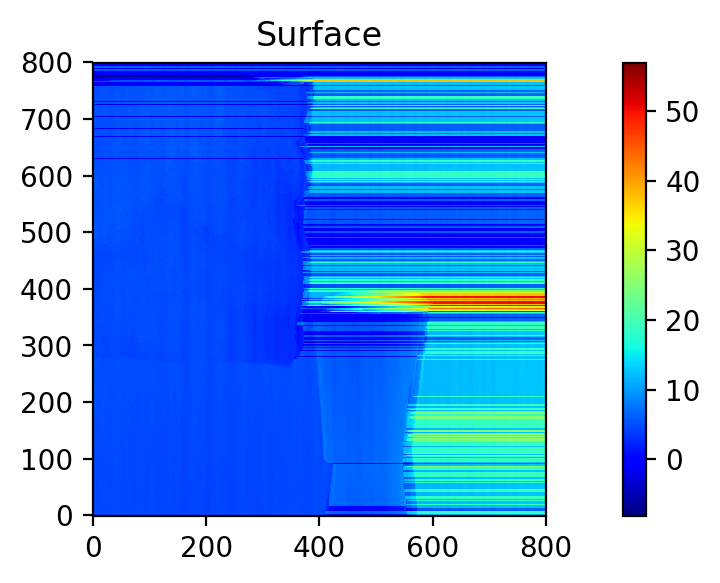

In [108]:
%matplotlib inline
plt.figure(figsize = [10,3], dpi = 200, facecolor = 'w')
X,Y = np.meshgrid(range(dim), range(dim))
"obj1"

Z = -(unwrapped_flat-unwrapped_obj1)
# Z[Z>4] = 4
# Z[Z<-1]= -1
# Z[Z>1] = 1
# Z[Z<0.75] = 0

"obj2"
# Z = unwrapped_flat-unwrapped_obj1

# Z[Z<-15] = -15
# Z = Z + 15
# Z[Z>9.5] = 0
# Z[Z<4]=0

plt.title("Surface")
plt.imshow(Z, cmap = 'jet', origin = 'lower')
plt.colorbar()


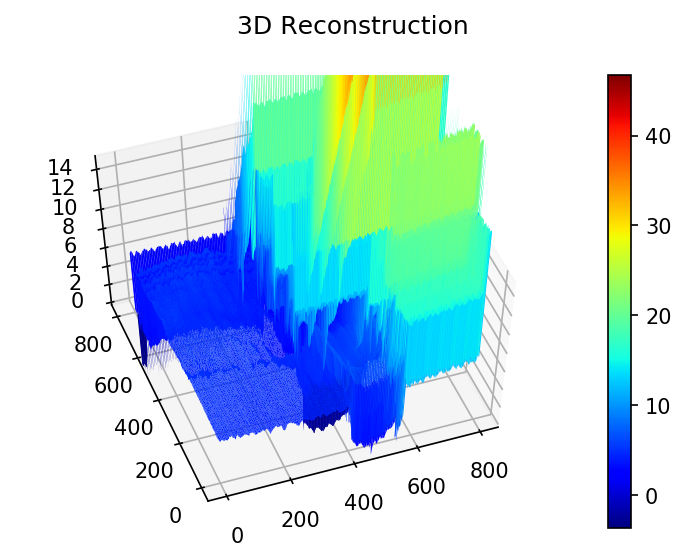

In [109]:
%matplotlib inline

fig = plt.figure(figsize = [6,4], dpi = 150, facecolor = 'w')
plt.rcParams.update({'font.size': 10})
ax = fig.add_subplot(111, projection='3d')
plt.suptitle("3D Reconstruction")

ax.set_zlim(0,15)
p = ax.plot_surface(X, Y, Z, cmap = 'jet', rstride=5, cstride=5)
ax.view_init(elev = 55,azim=250)
plt.colorbar(p)


In [18]:
help(np.unwrap)

Help on function unwrap in module numpy:

unwrap(p, discont=3.141592653589793, axis=-1)
    Unwrap by changing deltas between values to 2*pi complement.
    
    Unwrap radian phase `p` by changing absolute jumps greater than
    `discont` to their 2*pi complement along the given axis.
    
    Parameters
    ----------
    p : array_like
        Input array.
    discont : float, optional
        Maximum discontinuity between values, default is ``pi``.
    axis : int, optional
        Axis along which unwrap will operate, default is the last axis.
    
    Returns
    -------
    out : ndarray
        Output array.
    
    See Also
    --------
    rad2deg, deg2rad
    
    Notes
    -----
    If the discontinuity in `p` is smaller than ``pi``, but larger than
    `discont`, no unwrapping is done because taking the 2*pi complement
    would only make the discontinuity larger.
    
    Examples
    --------
    >>> phase = np.linspace(0, np.pi, num=5)
    >>> phase[3:] += np.pi
    >>>